# NLP Techniques
# Chemistry publications

## In this project:
### 1- I will creat a useful dataframe from an SQL database to gain more information on papers that have been published (1996-2016) in  the Journal of the American Chemical Society (JACS).
### 2- By  using NLP I will illustrate most frequent titles in two different datasets (JACS and ACS).

In [1]:
import sqlite3
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
conn = sqlite3.connect("jacs.sqlite")

In [3]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name")
cursor.fetchall()

[('Authors',), ('Paper_Authors',), ('Papers',), ('final',)]

In [4]:
cursor.execute("PRAGMA table_info(officers)").fetchall()

[]

In [5]:
authors = pd.read_sql("SELECT * FROM Authors", conn)
authors

,authorID,title,forename,initials,surname,orcidID
0,1,None,Roberto,,Pellicciari,None
1,2,None,Benedetto,,Natalini,None
2,3,None,Bahman,M.,Sadeghpour,None
3,4,None,Maura,,Marinozzi,None
4,5,None,James,P.,Snyder,None
...,...,...,...,...,...,...
120665,120666,None,Man,,Zhang,None
120666,120667,None,Sahani,,Weerasekara,None
120667,120668,None,Sarah,N.,Seiwald,None
120668,120669,None,Alex,,Meier,None


In [6]:
paper_authors = pd.read_sql("SELECT * FROM Paper_Authors", conn)
paper_authors

,paperID,authorID
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
278634,59467,120667
278635,59467,120668
278636,59467,117962
278637,59467,120669


In [7]:
papers = pd.read_sql("SELECT * FROM Papers", conn)
papers

,paperID,DOI,type,title,abstract,volume,issue,startpg,endpg,received,publishedOnline,publishedPrint,authorChoiceOA,editorChoiceOA,views,citations,scrapeDT
0,1,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1,118,1,12,1995-03-24 00:00:00.000000,1996-01-10 00:00:00.000000,1996-01-01 00:00:00.000000,0,0,1872,59,2017-07-06 23:29:12.618347
1,2,10.1021/ja950133y,Article,Absolute Kinetics of Aminium Radical Reactions...,Photolysis of N-nitrosamines in acidic acetoni...,1,118,13,19,1995-01-17 00:00:00.000000,1996-01-10 00:00:00.000000,1996-01-01 00:00:00.000000,0,0,979,41,2017-07-06 23:29:07.395517
2,3,10.1021/ja952003v,Article,Solvent Dependent Leaving Group Fluorine Kinet...,Fluorine kinetic isotope effects (F KIEs) have...,1,118,20,23,1995-06-20 00:00:00.000000,1996-01-10 00:00:00.000000,1996-01-01 00:00:00.000000,0,0,481,23,2017-07-06 23:28:25.790125
3,4,10.1021/ja951686b,Article,XAS Structural Comparisons of Reversibly Inter...,In this study on model compounds for the iron\...,1,118,24,34,1995-05-24 00:00:00.000000,1996-01-10 00:00:00.000000,1996-01-01 00:00:00.000000,0,0,456,61,2017-07-06 23:29:07.943408
4,5,10.1021/ja952470c,Article,Toward an Understanding of the High Enantiosel...,A systematic study of the possible diastereome...,1,118,35,42,1995-07-24 00:00:00.000000,1996-01-10 00:00:00.000000,1996-01-01 00:00:00.000000,0,0,769,52,2017-07-06 23:28:53.729800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59462,59463,10.1021/jacs.6b11084,Article,Amorphous Mixed-Metal Oxide Thin Films from Aq...,Thin films with tunable and homogeneous compos...,51,138,16800,16808,2016-10-24 00:00:00.000000,2016-12-03 00:00:00.000000,2016-12-28 00:00:00.000000,0,0,969,2,2017-07-08 00:35:54.220622
59463,59464,10.1021/jacs.6b11107,Article,Nonlinear Kinetic Behavior in Constitutional D...,Creating synthetic chemical systems which emul...,51,138,16809,16814,2016-10-25 00:00:00.000000,2016-12-19 00:00:00.000000,2016-12-28 00:00:00.000000,0,0,966,2,2017-07-08 02:19:16.754867
59464,59465,10.1021/jacs.6b11337,Article,Redox Active Ion-Paired Excited States Undergo...,Ion-pair interactions between a cationic ruthe...,51,138,16815,16826,2016-10-31 00:00:00.000000,2016-12-02 00:00:00.000000,2016-12-28 00:00:00.000000,0,0,1512,1,2017-07-08 00:32:43.247677
59465,59466,10.1021/jacs.6b11397,Article,Modulating Paratropicity Strength in Diareno-F...,Understanding and controlling the electronic s...,51,138,16827,16838,2016-11-02 00:00:00.000000,2016-12-01 00:00:00.000000,2016-12-28 00:00:00.000000,1,0,1583,8,2017-07-08 02:42:47.590473


In [8]:
#Joining three tables to prepare a more complete table:
df = pd.read_sql("SELECT * FROM Papers JOIN Paper_Authors ON Papers.paperID=Paper_Authors.paperID JOIN Authors ON Paper_Authors.authorID=Authors.authorID ", conn)
df

,paperID,DOI,type,title,abstract,volume,issue,startpg,endpg,received,...,citations,scrapeDT,paperID,authorID,authorID,title,forename,initials,surname,orcidID
0,1,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1,118,1,12,1995-03-24 00:00:00.000000,...,59,2017-07-06 23:29:12.618347,1,1,1,None,Roberto,,Pellicciari,None
1,1,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1,118,1,12,1995-03-24 00:00:00.000000,...,59,2017-07-06 23:29:12.618347,1,2,2,None,Benedetto,,Natalini,None
2,1,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1,118,1,12,1995-03-24 00:00:00.000000,...,59,2017-07-06 23:29:12.618347,1,3,3,None,Bahman,M.,Sadeghpour,None
3,1,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1,118,1,12,1995-03-24 00:00:00.000000,...,59,2017-07-06 23:29:12.618347,1,4,4,None,Maura,,Marinozzi,None
4,1,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1,118,1,12,1995-03-24 00:00:00.000000,...,59,2017-07-06 23:29:12.618347,1,5,5,None,James,P.,Snyder,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278634,59467,10.1021/jacs.6b12113,Article,Chiral-Substituted Poly-N-vinylpyrrolidinones ...,A new class of poly-N-vinylpyrrolidinones cont...,51,138,16839,16848,2016-11-23 00:00:00.000000,...,1,2017-07-08 01:51:46.378191,59467,120667,120667,None,Sahani,,Weerasekara,None
278635,59467,10.1021/jacs.6b12113,Article,Chiral-Substituted Poly-N-vinylpyrrolidinones ...,A new class of poly-N-vinylpyrrolidinones cont...,51,138,16839,16848,2016-11-23 00:00:00.000000,...,1,2017-07-08 01:51:46.378191,59467,120668,120668,None,Sarah,N.,Seiwald,None
278636,59467,10.1021/jacs.6b12113,Article,Chiral-Substituted Poly-N-vinylpyrrolidinones ...,A new class of poly-N-vinylpyrrolidinones cont...,51,138,16839,16848,2016-11-23 00:00:00.000000,...,1,2017-07-08 01:51:46.378191,59467,117962,117962,None,Vu,T.,Nguyen,None
278637,59467,10.1021/jacs.6b12113,Article,Chiral-Substituted Poly-N-vinylpyrrolidinones ...,A new class of poly-N-vinylpyrrolidinones cont...,51,138,16839,16848,2016-11-23 00:00:00.000000,...,1,2017-07-08 01:51:46.378191,59467,120669,120669,None,Alex,,Meier,None


In [55]:
#removing duplicated columns

In [9]:
df = df.loc[:,~df.columns.duplicated()]
df

,paperID,DOI,type,title,abstract,volume,issue,startpg,endpg,received,...,authorChoiceOA,editorChoiceOA,views,citations,scrapeDT,authorID,forename,initials,surname,orcidID
0,1,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1,118,1,12,1995-03-24 00:00:00.000000,...,0,0,1872,59,2017-07-06 23:29:12.618347,1,Roberto,,Pellicciari,None
1,1,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1,118,1,12,1995-03-24 00:00:00.000000,...,0,0,1872,59,2017-07-06 23:29:12.618347,2,Benedetto,,Natalini,None
2,1,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1,118,1,12,1995-03-24 00:00:00.000000,...,0,0,1872,59,2017-07-06 23:29:12.618347,3,Bahman,M.,Sadeghpour,None
3,1,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1,118,1,12,1995-03-24 00:00:00.000000,...,0,0,1872,59,2017-07-06 23:29:12.618347,4,Maura,,Marinozzi,None
4,1,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1,118,1,12,1995-03-24 00:00:00.000000,...,0,0,1872,59,2017-07-06 23:29:12.618347,5,James,P.,Snyder,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278634,59467,10.1021/jacs.6b12113,Article,Chiral-Substituted Poly-N-vinylpyrrolidinones ...,A new class of poly-N-vinylpyrrolidinones cont...,51,138,16839,16848,2016-11-23 00:00:00.000000,...,0,0,2332,1,2017-07-08 01:51:46.378191,120667,Sahani,,Weerasekara,None
278635,59467,10.1021/jacs.6b12113,Article,Chiral-Substituted Poly-N-vinylpyrrolidinones ...,A new class of poly-N-vinylpyrrolidinones cont...,51,138,16839,16848,2016-11-23 00:00:00.000000,...,0,0,2332,1,2017-07-08 01:51:46.378191,120668,Sarah,N.,Seiwald,None
278636,59467,10.1021/jacs.6b12113,Article,Chiral-Substituted Poly-N-vinylpyrrolidinones ...,A new class of poly-N-vinylpyrrolidinones cont...,51,138,16839,16848,2016-11-23 00:00:00.000000,...,0,0,2332,1,2017-07-08 01:51:46.378191,117962,Vu,T.,Nguyen,None
278637,59467,10.1021/jacs.6b12113,Article,Chiral-Substituted Poly-N-vinylpyrrolidinones ...,A new class of poly-N-vinylpyrrolidinones cont...,51,138,16839,16848,2016-11-23 00:00:00.000000,...,0,0,2332,1,2017-07-08 01:51:46.378191,120669,Alex,,Meier,None


In [10]:
df.isna().sum()

paperID                 0
DOI                     0
type                    0
title                   0
abstract            23986
volume                  0
issue                   0
startpg                 0
endpg                   0
received             3480
publishedOnline         0
publishedPrint          0
authorChoiceOA          0
editorChoiceOA          0
views                   0
citations               0
scrapeDT                0
authorID                0
forename                0
initials                0
surname                 0
orcidID            278639
dtype: int64

In [11]:
#Keeping necessary columns
df = df[["DOI", "type", "title", "abstract", "views", "citations", "forename", "surname"]]
df

,DOI,type,title,abstract,views,citations,forename,surname
0,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1872,59,Roberto,Pellicciari
1,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1872,59,Benedetto,Natalini
2,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1872,59,Bahman,Sadeghpour
3,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1872,59,Maura,Marinozzi
4,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1872,59,James,Snyder
...,...,...,...,...,...,...,...,...
278634,10.1021/jacs.6b12113,Article,Chiral-Substituted Poly-N-vinylpyrrolidinones ...,A new class of poly-N-vinylpyrrolidinones cont...,2332,1,Sahani,Weerasekara
278635,10.1021/jacs.6b12113,Article,Chiral-Substituted Poly-N-vinylpyrrolidinones ...,A new class of poly-N-vinylpyrrolidinones cont...,2332,1,Sarah,Seiwald
278636,10.1021/jacs.6b12113,Article,Chiral-Substituted Poly-N-vinylpyrrolidinones ...,A new class of poly-N-vinylpyrrolidinones cont...,2332,1,Vu,Nguyen
278637,10.1021/jacs.6b12113,Article,Chiral-Substituted Poly-N-vinylpyrrolidinones ...,A new class of poly-N-vinylpyrrolidinones cont...,2332,1,Alex,Meier


In [ ]:
# creating a table from final dataframe
engine = create_engine('sqlite:///jacs.sqlite')
df.to_sql('final', con=engine)

In [12]:
df.groupby("type").count()

,DOI,title,abstract,views,citations,forename,surname
type,,,,,,,
Addition/Correction,2318,2318,10,2318,2318,2318,2318
Article,154848,154848,154842,154848,154848,154848,154848
Book Review,919,919,0,919,919,919,919
Communication,120004,120004,99364,120004,120004,120004,120004
Computer Software Review,62,62,0,62,62,62,62
Editorial,45,45,0,45,45,45,45
Perspective,266,266,266,266,266,266,266
Retraction,6,6,0,6,6,6,6
Spotlights,171,171,171,171,171,171,171


In [13]:
df1 = df.groupby("type").mean()
df1

,views,citations
type,,
Addition/Correction,562.140638,3.089733
Article,1833.996590,61.784679
Book Review,213.594124,0.402612
Communication,2189.578064,65.561206
Computer Software Review,218.564516,1.258065
Editorial,3745.777778,7.533333
Perspective,6257.639098,96.996241
Retraction,1957.000000,1.000000
Spotlights,1293.964912,0.035088


In [14]:
df.corr()

,views,citations
views,1.000000,0.454618
citations,0.454618,1.000000


In [15]:
# Keep in mind, higher views wont necessarily bring higher citations:)

In [16]:
#Visualizing Views and Citations in each type

<IPython.core.display.Javascript object>


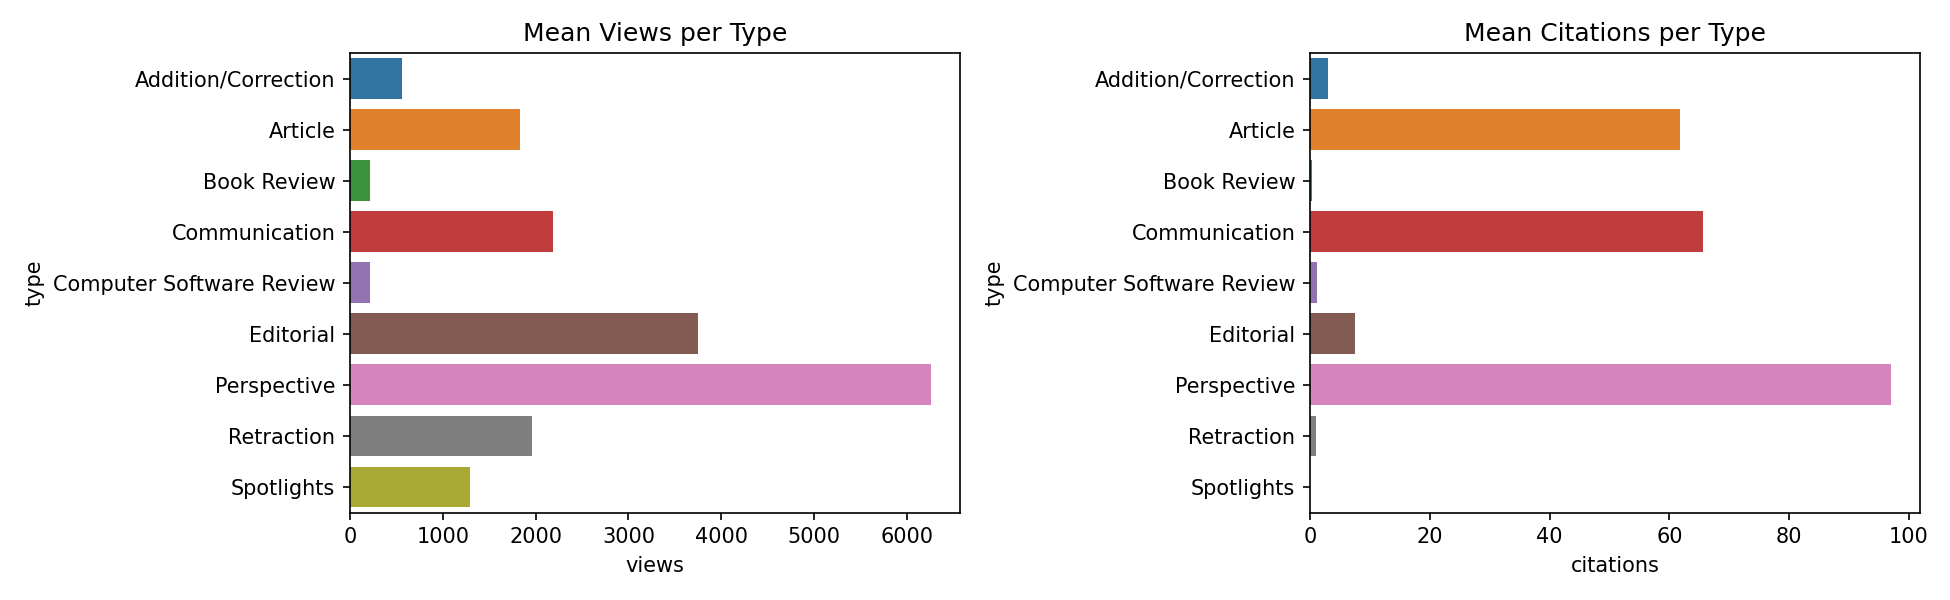

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
sns.barplot(data=df1, x='views', y=df1.index, ax=axs[0], orient='h')
sns.barplot(data=df1, x='citations', y=df1.index, ax=axs[1], orient='h')
plt.title("Views/Citation Mean per type", loc='center')
axs[0].set_title("Mean Views per Type", loc='center')
axs[1].set_title("Mean Citations per Type", loc='center')
plt.tight_layout()
plt.show()

## Using the code below you will be able to explore this great dataframe:
### By typing just a keyword related to the title you are looking for inside '% %' you will find out more on that title.
### You can also change the column and do the same thing on other columns (for example to look up all the papers of a specific author).

In [18]:
pd.read_sql("SELECT * FROM final WHERE title like '%benzene%' ", conn)

,index,DOI,type,title,abstract,views,citations,forename,surname
0,184,10.1021/ja9532289,Communication,"1,3-Bis(3,4-dimethylene-5-methyl-2-thienyl)ben...",None,214,16,Helen,Lu
1,185,10.1021/ja9532289,Communication,"1,3-Bis(3,4-dimethylene-5-methyl-2-thienyl)ben...",None,214,16,Jerome,Berson
2,446,10.1021/ja952376w,Article,Origins of the Exalted b2u Frequency in the Fi...,A mechanism for the frequency exaltation of th...,209,66,Sason,Shaik
3,447,10.1021/ja952376w,Article,Origins of the Exalted b2u Frequency in the Fi...,A mechanism for the frequency exaltation of th...,209,66,Avital,Shurki
4,448,10.1021/ja952376w,Article,Origins of the Exalted b2u Frequency in the Fi...,A mechanism for the frequency exaltation of th...,209,66,David,Danovich
...,...,...,...,...,...,...,...,...,...
2212,275046,10.1021/jacs.6b08714,Communication,"An Isolable Bismabenzene: Synthesis, Structure...","A stable bismabenzene was synthesized, isolate...",2857,0,Makoto,Yamashita
2213,275219,10.1021/jacs.6b07720,Article,Ultrafast Dynamics of Photoisomerization and S...,Investigating and deciphering the dynamics of ...,1616,4,Sabrina,Steinwand
2214,275220,10.1021/jacs.6b07720,Article,Ultrafast Dynamics of Photoisomerization and S...,Investigating and deciphering the dynamics of ...,1616,4,Zhilin,Yu
2215,275221,10.1021/jacs.6b07720,Article,Ultrafast Dynamics of Photoisomerization and S...,Investigating and deciphering the dynamics of ...,1616,4,Stefan,Hecht


In [19]:
# Visualizing most common types of publication:

<IPython.core.display.Javascript object>


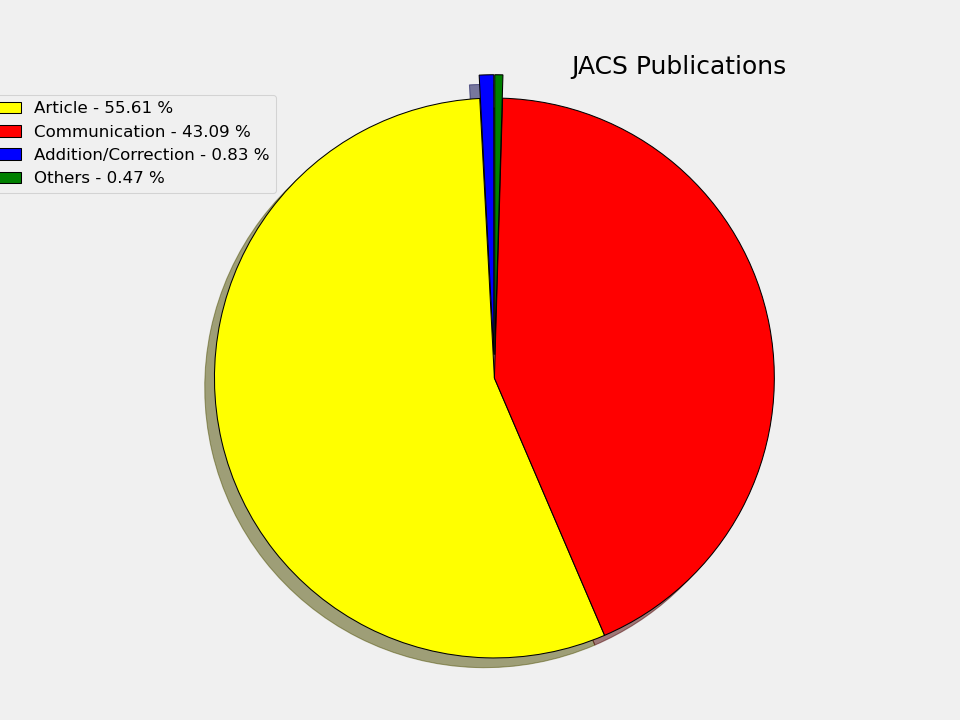

In [22]:
x = np.char.array(['Addition/Correction',
 'Article',
 'Communication',
 'Others'])
y = np.array([2318,154848,120004,1298])
colors = ["blue", "yellow", "red", "green"]
porcent = 100.*y/y.sum()

explode = [0.1,0,0,0.1]

plt.style.use('fivethirtyeight')

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2, explode = explode, wedgeprops = {"edgecolor":"black"}, shadow=True)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
explode = [0,0,0,0.1]
plt.legend(patches, labels, loc='best', bbox_to_anchor=(0.14, 1.),
           fontsize=8)
plt.title('JACS Publications', loc = 'right', fontsize=12)
plt.show()

# plt.savefig('piechart.png', bbox_inches='tight')

In [23]:
#word tokenization
nltk.download('punkt')
tokenized_messages = df['title'].str.lower().apply(word_tokenize)

print(tokenized_messages)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0         [the, reaction, of, α-diazo-β-hydroxy, esters,...
1         [the, reaction, of, α-diazo-β-hydroxy, esters,...
2         [the, reaction, of, α-diazo-β-hydroxy, esters,...
3         [the, reaction, of, α-diazo-β-hydroxy, esters,...
4         [the, reaction, of, α-diazo-β-hydroxy, esters,...
                                ...                        
278634    [chiral-substituted, poly-n-vinylpyrrolidinone...
278635    [chiral-substituted, poly-n-vinylpyrrolidinone...
278636    [chiral-substituted, poly-n-vinylpyrrolidinone...
278637    [chiral-substituted, poly-n-vinylpyrrolidinone...
278638    [chiral-substituted, poly-n-vinylpyrrolidinone...
Name: title, Length: 278639, dtype: object


In [24]:
# Define a function to returns only alphanumeric tokens
def alpha(text):
    """This function removes all non-alphanumeric characters"""
    alpha = []
    for i in text:
        if i not in ['-','/',',', '(', ')', ':', ';',']', ']', '+', '.', 'by', 'a', 'an', 'and', 'with', 'at', 'as', 'to', 'from', 'in', 'into', 'out', 'of', 'for' 'on', 'under', 'the', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0']:
            alpha.append(i)
    return alpha

# Apply our function to tokens
tokenized_messages = tokenized_messages.apply(alpha)
tokenized_messages

0         [reaction, α-diazo-β-hydroxy, esters, boron, t...
1         [reaction, α-diazo-β-hydroxy, esters, boron, t...
2         [reaction, α-diazo-β-hydroxy, esters, boron, t...
3         [reaction, α-diazo-β-hydroxy, esters, boron, t...
4         [reaction, α-diazo-β-hydroxy, esters, boron, t...
                                ...                        
278634    [chiral-substituted, poly-n-vinylpyrrolidinone...
278635    [chiral-substituted, poly-n-vinylpyrrolidinone...
278636    [chiral-substituted, poly-n-vinylpyrrolidinone...
278637    [chiral-substituted, poly-n-vinylpyrrolidinone...
278638    [chiral-substituted, poly-n-vinylpyrrolidinone...
Name: title, Length: 278639, dtype: object

In [25]:
# running the stopwords function on this data was taking so long so I decided to pass the common stopwords into a list and remove them from the text.

In [26]:
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize(text):
    """This function lemmatize the messages"""
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    # Create the lemmatized list
    lemmatized = []
    for i in text:
            # Lemmatize and append
            lemmatized.append(lemmatizer.lemmatize(i))
    return " ".join(lemmatized)

# Apply our function to tokens
tokenized_messages = tokenized_messages.apply(lemmatize)
tokenized_messages

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shaya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shaya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0         reaction α-diazo-β-hydroxy ester boron trifluo...
1         reaction α-diazo-β-hydroxy ester boron trifluo...
2         reaction α-diazo-β-hydroxy ester boron trifluo...
3         reaction α-diazo-β-hydroxy ester boron trifluo...
4         reaction α-diazo-β-hydroxy ester boron trifluo...
                                ...                        
278634    chiral-substituted poly-n-vinylpyrrolidinones ...
278635    chiral-substituted poly-n-vinylpyrrolidinones ...
278636    chiral-substituted poly-n-vinylpyrrolidinones ...
278637    chiral-substituted poly-n-vinylpyrrolidinones ...
278638    chiral-substituted poly-n-vinylpyrrolidinones ...
Name: title, Length: 278639, dtype: object

In [27]:
# adding a new column
df['nlp-words'] = tokenized_messages
df

,DOI,type,title,abstract,views,citations,forename,surname,nlp-words
0,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1872,59,Roberto,Pellicciari,reaction α-diazo-β-hydroxy ester boron trifluo...
1,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1872,59,Benedetto,Natalini,reaction α-diazo-β-hydroxy ester boron trifluo...
2,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1872,59,Bahman,Sadeghpour,reaction α-diazo-β-hydroxy ester boron trifluo...
3,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1872,59,Maura,Marinozzi,reaction α-diazo-β-hydroxy ester boron trifluo...
4,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1872,59,James,Snyder,reaction α-diazo-β-hydroxy ester boron trifluo...
...,...,...,...,...,...,...,...,...,...
278634,10.1021/jacs.6b12113,Article,Chiral-Substituted Poly-N-vinylpyrrolidinones ...,A new class of poly-N-vinylpyrrolidinones cont...,2332,1,Sahani,Weerasekara,chiral-substituted poly-n-vinylpyrrolidinones ...
278635,10.1021/jacs.6b12113,Article,Chiral-Substituted Poly-N-vinylpyrrolidinones ...,A new class of poly-N-vinylpyrrolidinones cont...,2332,1,Sarah,Seiwald,chiral-substituted poly-n-vinylpyrrolidinones ...
278636,10.1021/jacs.6b12113,Article,Chiral-Substituted Poly-N-vinylpyrrolidinones ...,A new class of poly-N-vinylpyrrolidinones cont...,2332,1,Vu,Nguyen,chiral-substituted poly-n-vinylpyrrolidinones ...
278637,10.1021/jacs.6b12113,Article,Chiral-Substituted Poly-N-vinylpyrrolidinones ...,A new class of poly-N-vinylpyrrolidinones cont...,2332,1,Alex,Meier,chiral-substituted poly-n-vinylpyrrolidinones ...


<IPython.core.display.Javascript object>


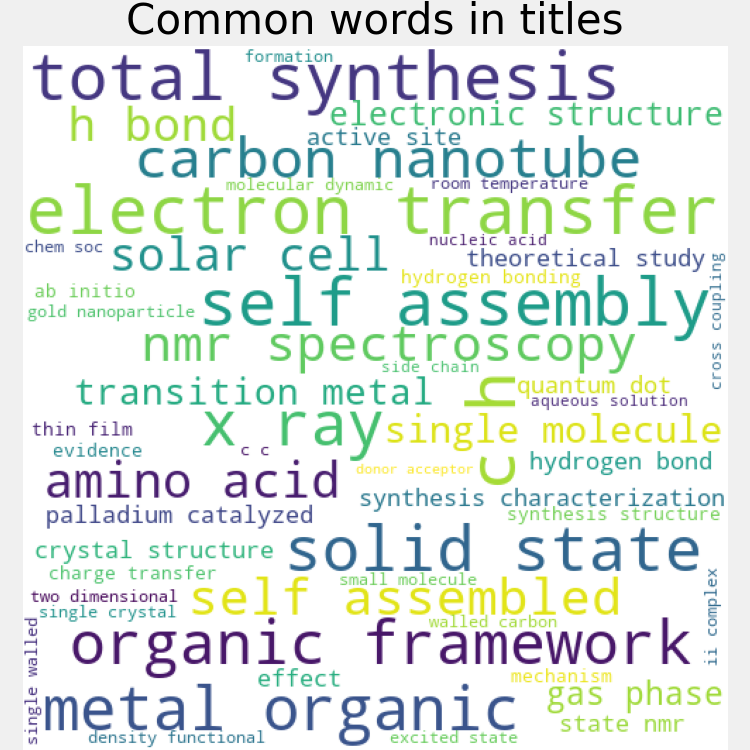

In [51]:
title = df["nlp-words"].str.cat(sep=', ')

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color ='white')

# Generate the world clouds
title_wc = wc.generate(title)

# plot the world cloud for spam                     
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(title_wc) 
plt.axis("off") 
plt.title("Common words in titles")
plt.tight_layout(pad = 0) 
plt.show() 
plt.savefig('jacs_wc.png')

In [29]:
# Well it looks like total synthesis, solid state and carbon nanotube are playing a great role!

In [30]:
df['nlp-words'] = df['nlp-words'].str.strip()

In [31]:
# just to see the most common Phrases used in this publications
word_freq = nltk.FreqDist(df["nlp-words"])
rslt=pd.DataFrame(word_freq.most_common(50),columns=['Phrase','Frequency'])
rslt

,Phrase,Frequency
0,spotlight on recent jacs publication,171
1,fluoride complexation element 104 rutherfordium,31
2,accurate reliable prediction relative ligand b...,29
3,sequential c–h arylation enantioselective hydr...,29
4,reduction-controlled viologen bisolvent enviro...,28
5,rapid proton-detected nmr assignment for prote...,28
6,phase transformation lithiation effect on elec...,27
7,discovery pyrophosphate diesters tunable solub...,27
8,aldol-based build/couple/pair strategy for syn...,26
9,biosynthesis allylmalonyl-coa extender unit fo...,26


### Now let's run the same codes on our second dataset (ACS):

In [32]:
data = pd.read_json("chemical_reviews.json")
data

,10.1021/acs.chemrev.0c00002,10.1021/acs.chemrev.0c00004,10.1021/acs.chemrev.0c00008,10.1021/acs.chemrev.0c00011,10.1021/acs.chemrev.0c00013,10.1021/acs.chemrev.0c00015,10.1021/acs.chemrev.0c00016,10.1021/acs.chemrev.0c00026,10.1021/acs.chemrev.0c00027,10.1021/acs.chemrev.0c00033,...,10.1021/crv120i018_1414413,10.1021/crv120i019_1419998,10.1021/crv120i019_1420013,10.1021/crv120i020_1424242,10.1021/crv120i020_1424243,10.1021/crv120i021_1427626,10.1021/crv120i021_1427638,10.1021/crv120i022_1431836,10.1021/crv120i022_1431855,10.1021/jf00005a700
title,Modern Stereoselective Synthesis of Chiral Sul...,Big-Data Science in Porous Materials: Material...,Inkjet Bioprinting of Biomaterials,Coinage-Metal-Based Cyclic Trinuclear Complexe...,Strategies for Fine-Tuning the Conformations o...,Physical and Chemical Factors Influencing the ...,Hierarchically Structured Zeolites: From Desig...,Advanced Thermoelectric Design: From Materials...,Biomaterials for Bioprinting Microvasculature,Electronic Devices Using Open Framework Materials,...,Issue Editorial Masthead,Issue Publication Information,Issue Editorial Masthead,Issue Publication Information,Issue Editorial Masthead,Issue Publication Information,Issue Editorial Masthead,Issue Publication Information,Issue Editorial Masthead,Masthead
authors,"[Elżbieta Wojaczyńska*, Jacek Wojaczyński]","[Kevin Maik Jablonka, Daniele Ongari, Seyed Mo...","[Xinda Li, Boxun Liu, Ben Pei, Jianwei Chen, D...","[Ji Zheng, Zhou Lu, Kun Wu, Guo-Hong Ning*, Da...","[Rasha Jwad, Daniel Weissberger, Luke Hunter*]","[Sang Cheon Lee, Gregory Gillispie, Peter Prim...","[Li-Hua Chen*, Ming-Hui Sun, Zhao Wang, Weimin...","[Xiao-Lei Shi, Jin Zou*, Zhi-Gang Chen*]","[Ryan W. Barrs, Jia Jia, Sophia E. Silver, Mic...","[Mark D. Allendorf*, Renhao Dong, Xinliang Fen...",...,[],[],[],[],[],[],[],[],[],[]
journal,Chemical Reviews,Chemical Reviews,Chemical Reviews,Chemical Reviews,Chemical Reviews,Chemical Reviews,Chemical Reviews,Chemical Reviews,Chemical Reviews,Chemical Reviews,...,Chemical Reviews,Chemical Reviews,Chemical Reviews,Chemical Reviews,Chemical Reviews,Chemical Reviews,Chemical Reviews,Chemical Reviews,Chemical Reviews,Chemical Reviews
year,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,1975
volume,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,75
issue,10,16,19,17,17,19,20,15,19,16,...,18,19,19,20,20,21,21,22,22,6
page_start,4578,8066,10793,9675,9743,10834,11194,7399,10887,8581,...,None,None,None,None,None,None,None,None,None,None
page_end,4611,8129,10833,9742,9789,10886,11294,7515,10949,8640,...,None,None,None,None,None,None,None,None,None,None
article_type,Review,Review,Review,Review,Review,Review,Review,Review,Review,Review,...,Article,Article,Article,Article,Article,Article,Article,Article,Article,Article
pub_date,"April 29, 2020","June 10, 2020","September 9, 2020","August 11, 2020","August 5, 2020","August 20, 2020","September 11, 2020","July 2, 2020","September 1, 2020","July 21, 2020",...,"September 23, 2020","October 14, 2020","October 14, 2020","October 28, 2020","October 28, 2020","November 11, 2020","November 11, 2020","November 25, 2020","November 25, 2020","December 1, 1975"


In [33]:
#It looks so weird! Let's fix it:

In [34]:
data = data.transpose()
data

,title,authors,journal,year,volume,issue,page_start,page_end,article_type,pub_date,abstract
10.1021/acs.chemrev.0c00002,Modern Stereoselective Synthesis of Chiral Sul...,"[Elżbieta Wojaczyńska*, Jacek Wojaczyński]",Chemical Reviews,2020,120,10,4578,4611,Review,"April 29, 2020","Chiral sulfinyl compounds, sulfoxides, sulfoxi..."
10.1021/acs.chemrev.0c00004,Big-Data Science in Porous Materials: Material...,"[Kevin Maik Jablonka, Daniele Ongari, Seyed Mo...",Chemical Reviews,2020,120,16,8066,8129,Review,"June 10, 2020",By combining metal nodes with organic linkers ...
10.1021/acs.chemrev.0c00008,Inkjet Bioprinting of Biomaterials,"[Xinda Li, Boxun Liu, Ben Pei, Jianwei Chen, D...",Chemical Reviews,2020,120,19,10793,10833,Review,"September 9, 2020",The inkjet technique has the capability of gen...
10.1021/acs.chemrev.0c00011,Coinage-Metal-Based Cyclic Trinuclear Complexe...,"[Ji Zheng, Zhou Lu, Kun Wu, Guo-Hong Ning*, Da...",Chemical Reviews,2020,120,17,9675,9742,Review,"August 11, 2020","Among the d10 coinage metal complexes, cyclic ..."
10.1021/acs.chemrev.0c00013,Strategies for Fine-Tuning the Conformations o...,"[Rasha Jwad, Daniel Weissberger, Luke Hunter*]",Chemical Reviews,2020,120,17,9743,9789,Review,"August 5, 2020",Cyclic peptides are promising scaffolds for dr...
...,...,...,...,...,...,...,...,...,...,...,...
10.1021/crv120i021_1427626,Issue Publication Information,[],Chemical Reviews,2020,120,21,None,None,Article,"November 11, 2020",None
10.1021/crv120i021_1427638,Issue Editorial Masthead,[],Chemical Reviews,2020,120,21,None,None,Article,"November 11, 2020",None
10.1021/crv120i022_1431836,Issue Publication Information,[],Chemical Reviews,2020,120,22,None,None,Article,"November 25, 2020",None
10.1021/crv120i022_1431855,Issue Editorial Masthead,[],Chemical Reviews,2020,120,22,None,None,Article,"November 25, 2020",None


In [35]:
#turning the index to a new column (doi)
data["doi"] = data.index
data = data.reset_index(drop=True)
#drpping unnecessary columns
data.drop(['year', 'journal', 'volume', 'issue', 'page_start', 'page_end'], axis=1, inplace=True)
data

,title,authors,article_type,pub_date,abstract,doi
0,Modern Stereoselective Synthesis of Chiral Sul...,"[Elżbieta Wojaczyńska*, Jacek Wojaczyński]",Review,"April 29, 2020","Chiral sulfinyl compounds, sulfoxides, sulfoxi...",10.1021/acs.chemrev.0c00002
1,Big-Data Science in Porous Materials: Material...,"[Kevin Maik Jablonka, Daniele Ongari, Seyed Mo...",Review,"June 10, 2020",By combining metal nodes with organic linkers ...,10.1021/acs.chemrev.0c00004
2,Inkjet Bioprinting of Biomaterials,"[Xinda Li, Boxun Liu, Ben Pei, Jianwei Chen, D...",Review,"September 9, 2020",The inkjet technique has the capability of gen...,10.1021/acs.chemrev.0c00008
3,Coinage-Metal-Based Cyclic Trinuclear Complexe...,"[Ji Zheng, Zhou Lu, Kun Wu, Guo-Hong Ning*, Da...",Review,"August 11, 2020","Among the d10 coinage metal complexes, cyclic ...",10.1021/acs.chemrev.0c00011
4,Strategies for Fine-Tuning the Conformations o...,"[Rasha Jwad, Daniel Weissberger, Luke Hunter*]",Review,"August 5, 2020",Cyclic peptides are promising scaffolds for dr...,10.1021/acs.chemrev.0c00013
...,...,...,...,...,...,...
7721,Issue Publication Information,[],Article,"November 11, 2020",None,10.1021/crv120i021_1427626
7722,Issue Editorial Masthead,[],Article,"November 11, 2020",None,10.1021/crv120i021_1427638
7723,Issue Publication Information,[],Article,"November 25, 2020",None,10.1021/crv120i022_1431836
7724,Issue Editorial Masthead,[],Article,"November 25, 2020",None,10.1021/crv120i022_1431855


In [36]:
data.groupby("article_type").count()

,title,authors,pub_date,abstract,doi
article_type,,,,,
Addition/Correction,90,90,90,0,90
Article,4576,4576,4576,0,4576
Editorial,183,183,183,0,183
Review,2817,2817,2817,1169,2817
Reviews,1,1,1,0,1
article,59,59,59,0,59


In [37]:
# Visualizing most common types of publication:

<IPython.core.display.Javascript object>


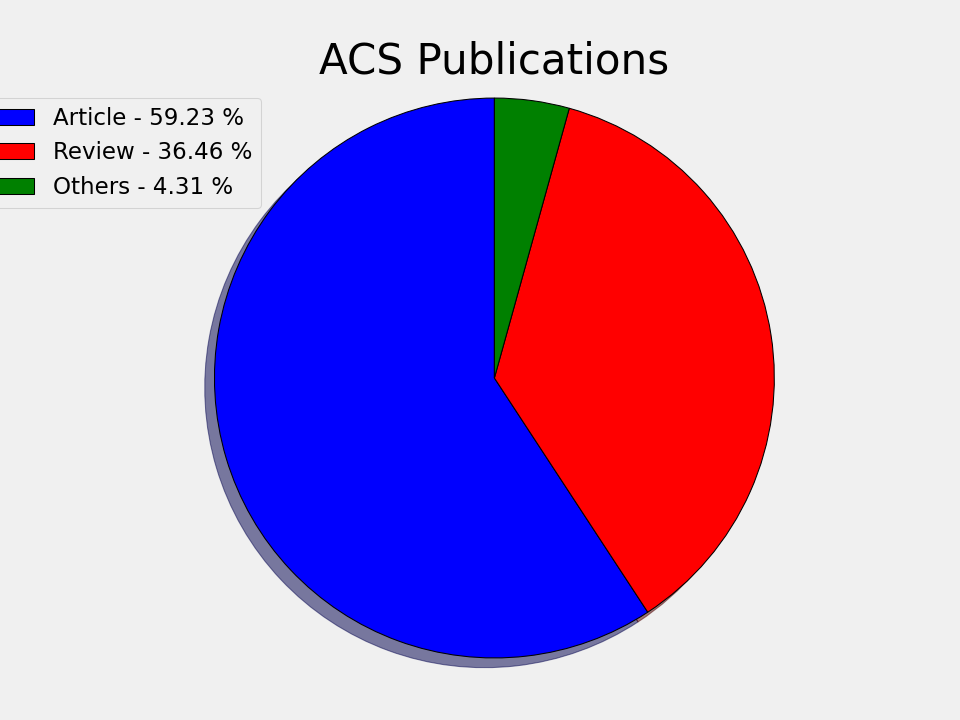

In [50]:
x = np.char.array(['Article',
 'Review',
 'Others'])
y = np.array([4576,2817,333])
colors = ["blue", "red", "green"]
porcent = 100.*y/y.sum()

plt.style.use('fivethirtyeight')

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2, wedgeprops = {"edgecolor":"black"}, shadow=True)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.title('ACS Publications')    
plt.legend(patches, labels, loc='best', bbox_to_anchor=(0.12, 1.),
           fontsize=11)
plt.show()

# plt.savefig('piechart.png', bbox_inches='tight')

In [39]:
#word tokenization
nltk.download('punkt')
tokenized_messages = data['title'].str.lower().apply(word_tokenize)

print(tokenized_messages)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       [modern, stereoselective, synthesis, of, chira...
1       [big-data, science, in, porous, materials, :, ...
2                 [inkjet, bioprinting, of, biomaterials]
3       [coinage-metal-based, cyclic, trinuclear, comp...
4       [strategies, for, fine-tuning, the, conformati...
                              ...                        
7721                    [issue, publication, information]
7722                         [issue, editorial, masthead]
7723                    [issue, publication, information]
7724                         [issue, editorial, masthead]
7725                                           [masthead]
Name: title, Length: 7726, dtype: object


In [40]:
# Define a function to returns only alphanumeric tokens
def alpha(tokens):
    """This function removes all non-alphanumeric characters"""
    alpha = []
    for token in tokens:
        if str.isalpha(token):
            alpha.append(token)
    return alpha

# Apply our function to tokens
tokenized_messages = tokenized_messages.apply(alpha)
print(tokenized_messages)

0       [modern, stereoselective, synthesis, of, chira...
1       [science, in, porous, materials, materials, ge...
2                 [inkjet, bioprinting, of, biomaterials]
3       [cyclic, trinuclear, complexes, with, interact...
4       [strategies, for, the, conformations, of, cycl...
                              ...                        
7721                    [issue, publication, information]
7722                         [issue, editorial, masthead]
7723                    [issue, publication, information]
7724                         [issue, editorial, masthead]
7725                                           [masthead]
Name: title, Length: 7726, dtype: object


In [41]:
# Define a function to remove stop words
def remove_stop_words(tokens):
    """This function removes all stop words in terms of nltk stopwords"""
    no_stop = []
    for token in tokens:
        if token not in stopwords.words('english'):
            no_stop.append(token)
    return no_stop

# Apply our function to tokens
tokenized_messages = tokenized_messages.apply(remove_stop_words)
print(tokenized_messages)

0       [modern, stereoselective, synthesis, chiral, s...
1       [science, porous, materials, materials, genomi...
2                     [inkjet, bioprinting, biomaterials]
3       [cyclic, trinuclear, complexes, interactions, ...
4           [strategies, conformations, cyclic, peptides]
                              ...                        
7721                    [issue, publication, information]
7722                         [issue, editorial, masthead]
7723                    [issue, publication, information]
7724                         [issue, editorial, masthead]
7725                                           [masthead]
Name: title, Length: 7726, dtype: object


In [42]:
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize(tokens):
    """This function lemmatize the messages"""
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    # Create the lemmatized list
    lemmatized = []
    for token in tokens:
            # Lemmatize and append
            lemmatized.append(lemmatizer.lemmatize(token))
    return " ".join(lemmatized)

# Apply our function to tokens
tokenized_messages = tokenized_messages.apply(lemmatize)
print(tokenized_messages)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shaya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shaya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0       modern stereoselective synthesis chiral sulfin...
1       science porous material material genomics mach...
2                         inkjet bioprinting biomaterials
3       cyclic trinuclear complex interaction theory e...
4                    strategy conformation cyclic peptide
                              ...                        
7721                        issue publication information
7722                             issue editorial masthead
7723                        issue publication information
7724                             issue editorial masthead
7725                                             masthead
Name: title, Length: 7726, dtype: object


In [43]:
data['nlp-words'] = tokenized_messages

<IPython.core.display.Javascript object>


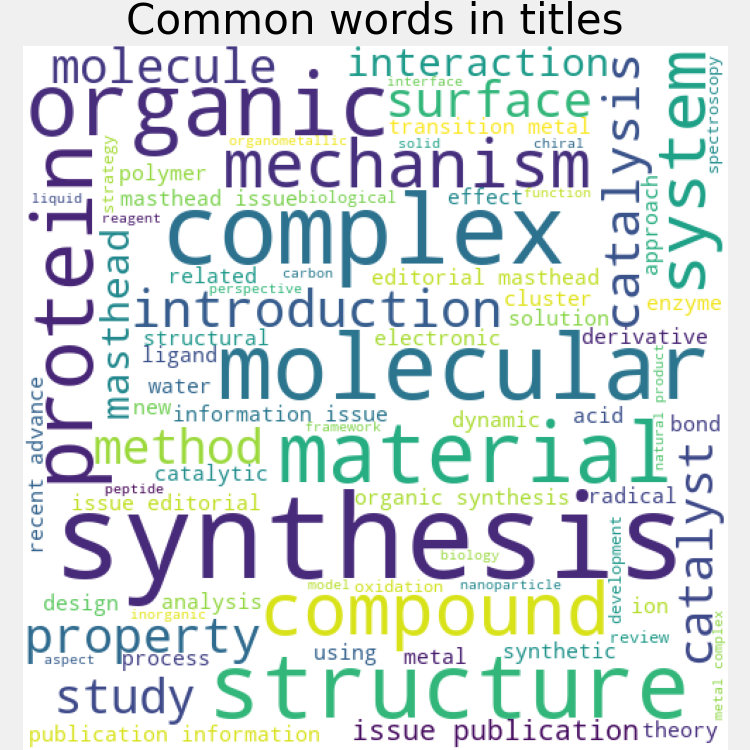

In [44]:
title = data["nlp-words"].str.cat(sep=', ')

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color ='white', stopwords = set(list(STOPWORDS) + ['chemistry', 'chemical', 'reaction', 'application']))

# Generate the world clouds
title_wc = wc.generate(title)

# plot the world cloud for spam                     
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(title_wc) 
plt.axis("off") 
plt.title("Common words in titles")
plt.tight_layout(pad = 0) 
plt.show() 
plt.savefig('acs1_wc.png')

In [45]:
# Still synthesis?!